Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from tensorflow import feature_column
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt

Importing Dataset

In [ ]:
# Dataset : https://www.kaggle.com/saurabhshahane/wild-blueberry-yield-prediction

dataset = pd.read_csv("WildBlueberryPollinationSimulationData.csv")

In [ ]:
dataset.head(10)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
5,5,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.309669,0.366284,27.345453,2825.003738
6,6,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.284443,0.352186,26.101179,2625.269164
7,7,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.246568,0.342826,25.042361,2379.905214
8,8,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.427977,0.414711,32.334153,4234.868585
9,9,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.464366,0.436346,34.849953,5356.871861


In [ ]:
dataset.drop(['Row#'],axis=1,inplace=True)

EDA

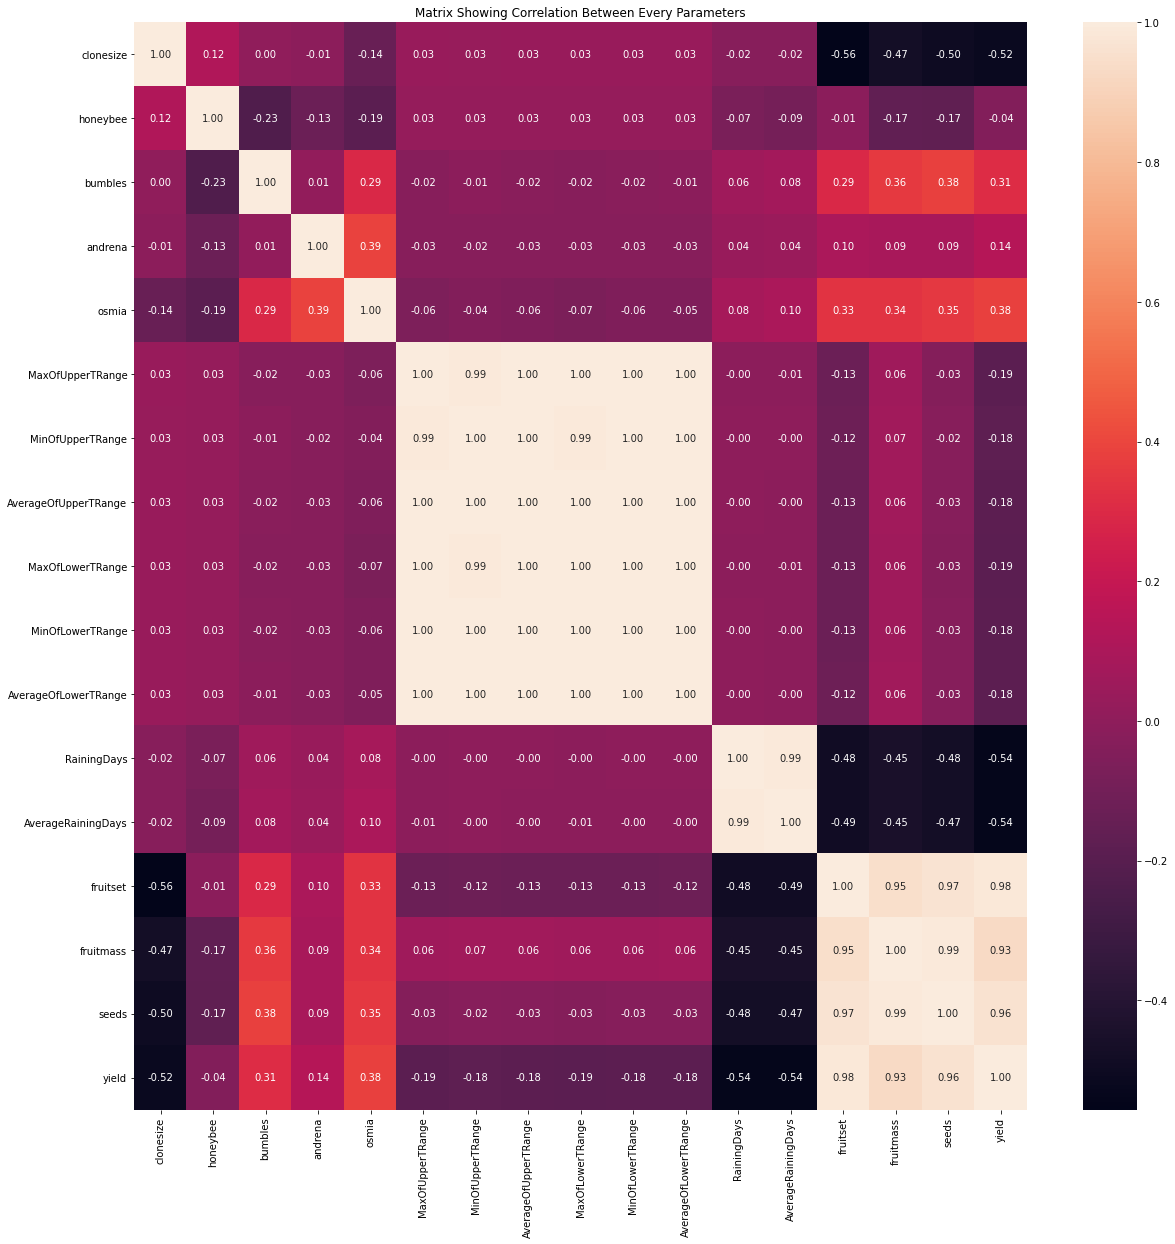

In [ ]:
plt.figure(figsize=(20,20))
ax = plt.axes()
corr = dataset.corr()
sns.heatmap(corr, fmt='.2f', annot=True)
ax.set_title('Matrix Showing Correlation Between Every Parameters')
plt.show()

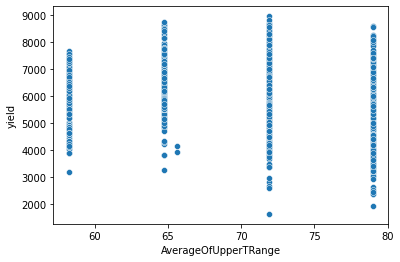

In [ ]:
sns.scatterplot(data=dataset, x="AverageOfUpperTRange", y="yield")

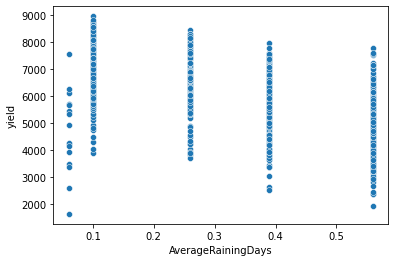

In [ ]:
sns.scatterplot(data=dataset, x="AverageRainingDays", y="yield")

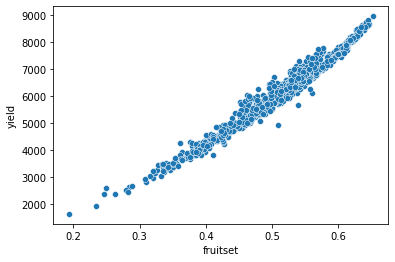

In [ ]:
sns.scatterplot(data=dataset, x="fruitset", y="yield")

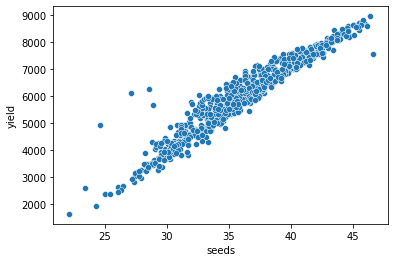

In [ ]:
sns.scatterplot(data=dataset, x="seeds", y="yield")

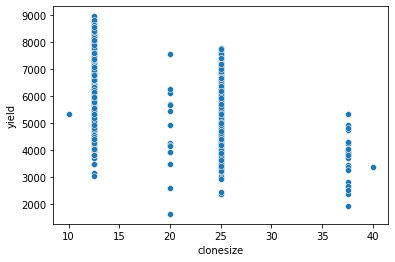

In [ ]:
sns.scatterplot(data=dataset, x="clonesize", y="yield")

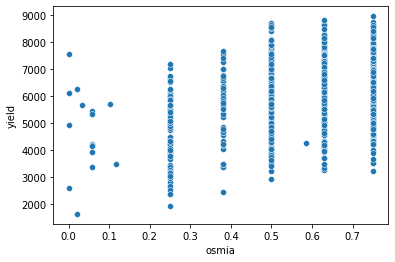

In [ ]:
sns.scatterplot(data=dataset, x="osmia", y="yield")

Observations

In [ ]:
X = dataset[['fruitset','fruitmass','seeds']]

Action

In [ ]:
Y1 = dataset[['AverageOfUpperTRange']]

Output

In [ ]:
Y2 = dataset[['yield']]

Truncating Decimal Values

In [ ]:
Y1['action'] = (Y1['AverageOfUpperTRange']).round(decimals = 0)

In [ ]:
y1 = Y1[['action']]

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

Train-Test Split

In [ ]:
x_train = X[0:int(len(X)*0.80)]
x_test = X[int(len(X)*0.80):]

In [ ]:
y_train = y1[0:int(len(X)*0.80)]
y_test = y1[int(len(X)*0.80):]

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)


80


# Classification 

Classification Model 

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3))
model.add(Dense(150, activation='relu'))
model.add(Dense(240, activation='relu'))
model.add(Dense(80, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# build the model
model.fit(x_train, y_train, epochs=2500)

Streaming output truncated to the last 5000 lines.
Epoch 1/2500
20/20 [==============================] - 0s 2ms/step - loss: 3.0937 - accuracy: 0.1505
Epoch 2/2500
20/20 [==============================] - 0s 2ms/step - loss: 1.4802 - accuracy: 0.2703
Epoch 3/2500
20/20 [==============================] - 0s 2ms/step - loss: 1.5211 - accuracy: 0.2303
Epoch 4/2500
20/20 [==============================] - 0s 2ms/step - loss: 1.4045 - accuracy: 0.2663
Epoch 5/2500
20/20 [==============================] - 0s 2ms/step - loss: 1.4220 - accuracy: 0.2301
Epoch 6/2500
20/20 [==============================] - 0s 2ms/step - loss: 1.4432 - accuracy: 0.2763
Epoch 7/2500
20/20 [==============================] - 0s 2ms/step - loss: 1.4961 - accuracy: 0.2176
Epoch 8/2500
20/20 [==============================] - 0s 2ms/step - loss: 1.4188 - accuracy: 0.3060
Epoch 9/2500
20/20 [==============================] - 0s 4ms/step - loss: 1.4862 - accuracy: 0.2457
Epoch 10/2500
20/20 [============================

Printing Accuracy

In [ ]:
pred_train= model.predict(x_train)
scores = model.evaluate(x_train, y_train, verbose=0)
x = round(scores[1]*100,2);
print('Accuracy on train data: {}% \n Error on test data: {}'.format(x, round(100 - x,4)))   
 
pred_test= model.predict(x_test)
scores2 = model.evaluate(x_test, y_test, verbose=0)
x = round(scores2[1]*100,2);
print('Accuracy on test data: {}% \n Error on test data: {}'.format(x, round(100 - x,4)))    

Accuracy on train data: 62.0% 
 Error on test data: 38.0
Accuracy on test data: 55.13% 
 Error on test data: 44.87


Taking Predicted Values into DataFrame

In [ ]:
pred_train = np.argmax(pred_train,axis=1)
pred_test = np.argmax(pred_test,axis=1)

In [ ]:
pred_train = pred_train.reshape(621,1)
pred_test=pred_test.reshape(156,1)

In [ ]:
act = pd.DataFrame(pred_train, columns = ['Action'])
act1 = pd.DataFrame(pred_test, columns = ['Action'])
frames = [act,act1]

result = pd.concat(frames,axis=0,ignore_index=True)

Using Actual Values From the Dataset

In [ ]:
import pandas as pd

X = dataset[['fruitset','fruitmass','seeds','AverageOfUpperTRange']]
Y = Y2

In [ ]:
X['AverageOfUpperTRange'] =  X['AverageOfUpperTRange'].round(decimals = 0)

In [ ]:
X = X.values
Y = Y2.values

Linear Regression

In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression  
lin_regs1= LinearRegression()  
lin_regs1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
round(lin_regs1.score(X,Y)*100,2)

98.24

Polynomial Regression

In [ ]:
 #Fitting the Polynomial regression to the dataset  
from sklearn.preprocessing import PolynomialFeatures  
poly_regs1= PolynomialFeatures(degree= 3)  
x_poly= poly_regs1.fit_transform(X)  
poly_reg_1 =LinearRegression()  
poly_reg_1.fit(x_poly, Y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
round(poly_reg_1.score(x_poly,Y)*100,2)

98.55

In [ ]:
poly_pred = poly_reg_1.predict(poly_regs1.fit_transform([[0.246568,0.342826,25.042361,79.0]]))  
print(poly_pred) 

[[2181.40452577]]


In [ ]:
pred_train = poly_reg_1.predict(x_poly)

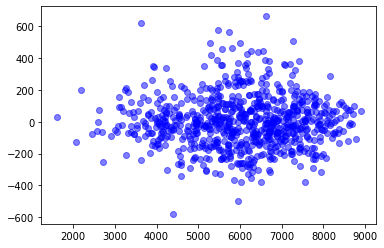

In [ ]:
plt.scatter(pred_train,(Y-pred_train),c='b',alpha=0.5)

----------------------------------------------------

Using Random Values as Action

In [ ]:
XX =  dataset[['fruitset','fruitmass','seeds']]

In [ ]:
XX['TRange'] = np.random.randint(56,80, size=len(XX))

In [ ]:
YY =Y2

Linear Regression

In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression  
lin_regs2= LinearRegression()  
lin_regs2.fit(XX,YY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
round(lin_regs2.score(XX,YY)*100,2)

98.24

Polynomial Regression

In [ ]:
 #Fitting the Polynomial regression to the dataset  
from sklearn.preprocessing import PolynomialFeatures  
poly_regs2= PolynomialFeatures(degree= 7)  
x_poly2= poly_regs2.fit_transform(XX)  
poly_reg_2 =LinearRegression()  
poly_reg_2.fit(x_poly2, YY) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
round(poly_reg_2.score(x_poly2,YY)*100,2)

92.88

In [ ]:
pred_rand = poly_reg_2.predict(x_poly2)

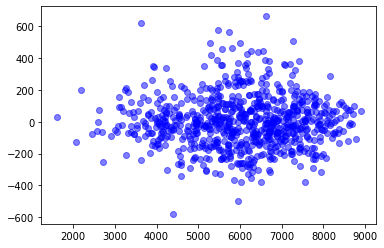

In [ ]:
plt.scatter(pred_train,(YY-pred_train),c='b',alpha=0.5)

__________________________________________________________

Using Values from Predicted Action

In [ ]:
d = dataset[['fruitset','fruitmass','seeds']]

In [ ]:
data  = dataset[['fruitset','fruitmass','seeds']] , result[['Action']]
X3 = pd.concat(data, axis=1)

In [ ]:
Y3 = Y2

Linear Regression

In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression  
lin_regs3= LinearRegression()  
lin_regs3.fit(X3,Y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
round(lin_regs3.score(X3,Y3)*100,2)

98.24

Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures  
poly_regs3= PolynomialFeatures(degree= 1)  
x_poly3= poly_regs3.fit_transform(X3)  
poly_reg_3 =LinearRegression()  
poly_reg_3.fit(x_poly3, Y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
round(poly_reg_3.score(x_poly3,Y3)*100,2)

98.24

In [ ]:
pred_class = poly_reg_3.predict(x_poly3)

Text(0.5, 1.0, 'Comparision')

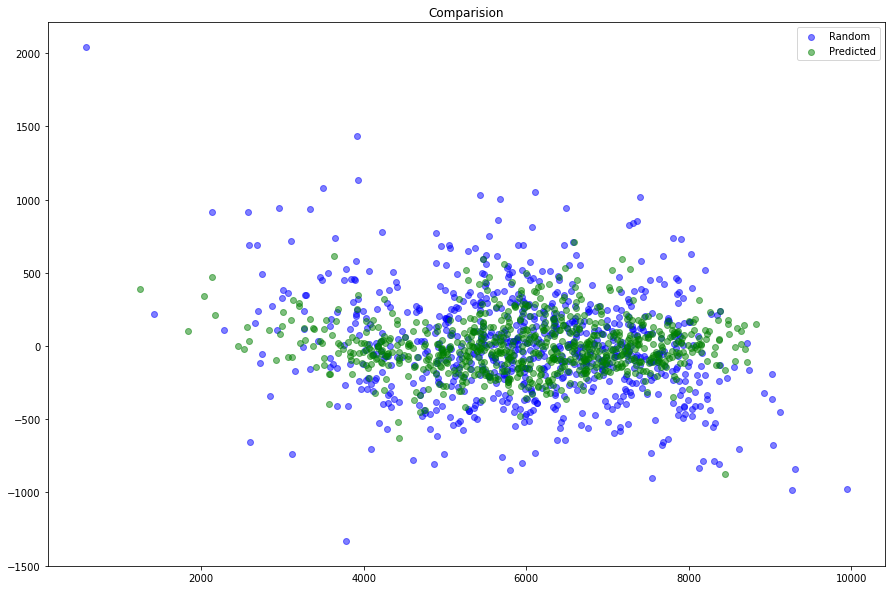

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(pred_rand,(Y-pred_rand),c='b',label="Random",alpha=0.5)
plt.scatter(pred_class,(Y-pred_class),c='g',label="Predicted",alpha=0.5)

plt.legend()
plt.title('Comparision')


The below graph shows the comparision between different Action Values

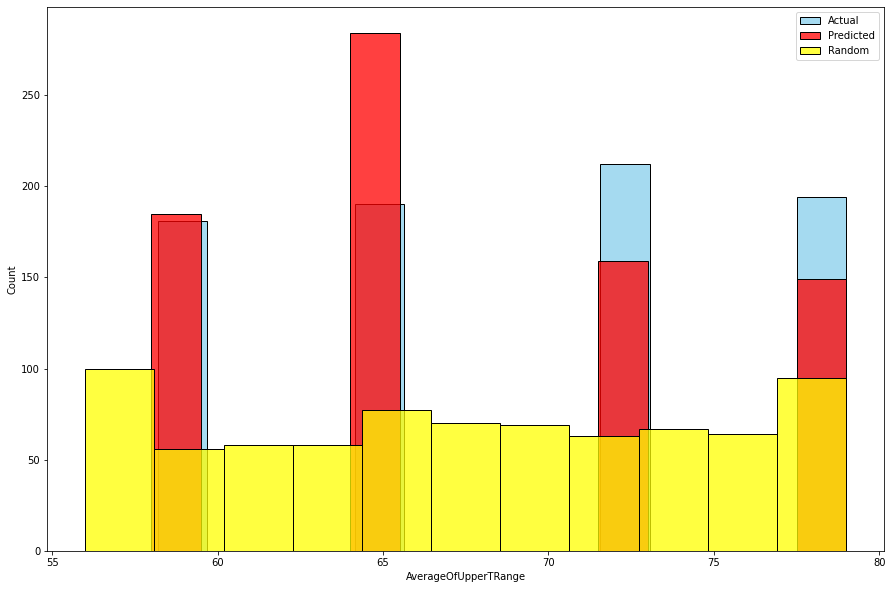

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.histplot(data=dataset, x="AverageOfUpperTRange", color="skyblue", label="Actual")
sns.histplot(data=result, x="Action", color="red", label="Predicted")
sns.histplot(data=XX, x="TRange", color="yellow", label="Random")

plt.legend() 
plt.show()

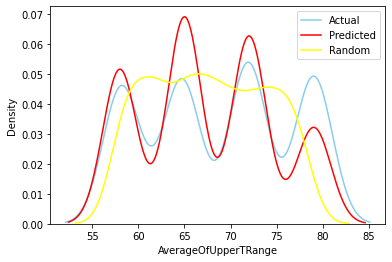

In [ ]:
sns.kdeplot(data=dataset, x="AverageOfUpperTRange", color="skyblue", label="Actual")
sns.kdeplot(data=result, x="Action", color="red", label="Predicted")
sns.kdeplot(data=XX, x="TRange", color="yellow", label="Random")

plt.legend() 
plt.show()